keypoints for Image 1 2614
keypoints for Image 2 2147
features count:  128


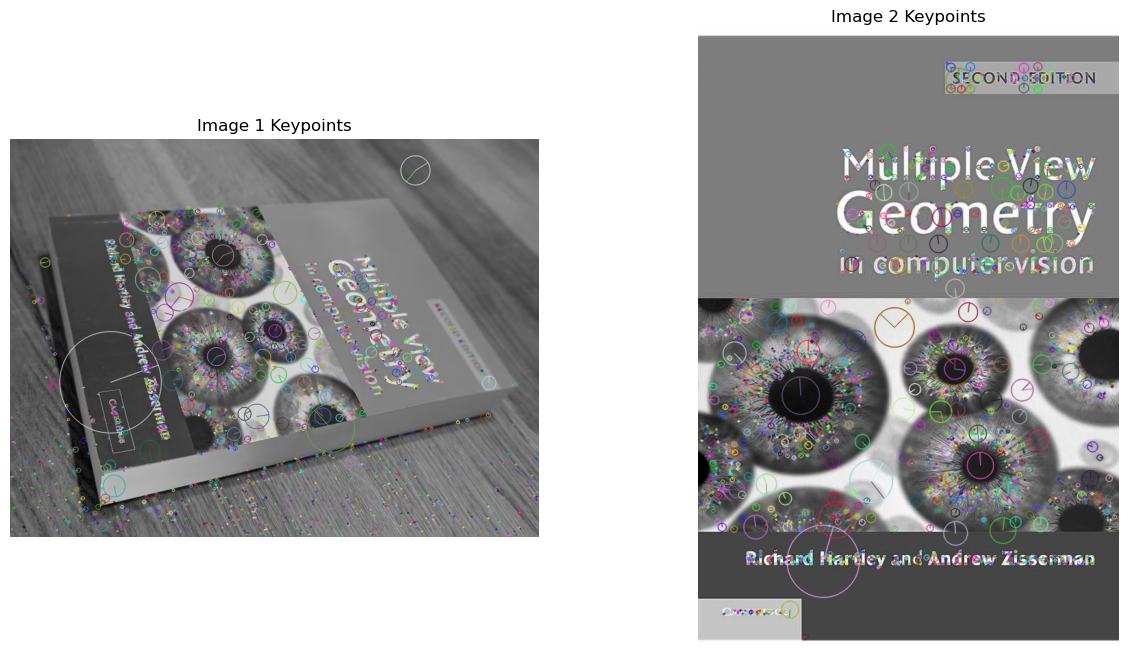

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('lab5/book-1.jpg')
img2 = cv.imread('lab5/book-2.jpg')
gray1= cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
gray2= cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
img1 = cv.drawKeypoints(gray1, kp1, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2 = cv.drawKeypoints(gray2, kp2, img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(img1)
ax[0].set_title('Image 1 Keypoints')
ax[0].axis('off')

ax[1].imshow(img2)
ax[1].set_title('Image 2 Keypoints')
ax[1].axis('off')

print("keypoints for Image 1", len(kp1))
print("keypoints for Image 2", len(kp2))
print("features count: ", des1.shape[1])

Matches without ratio test 2624
Matches with ratio test 10


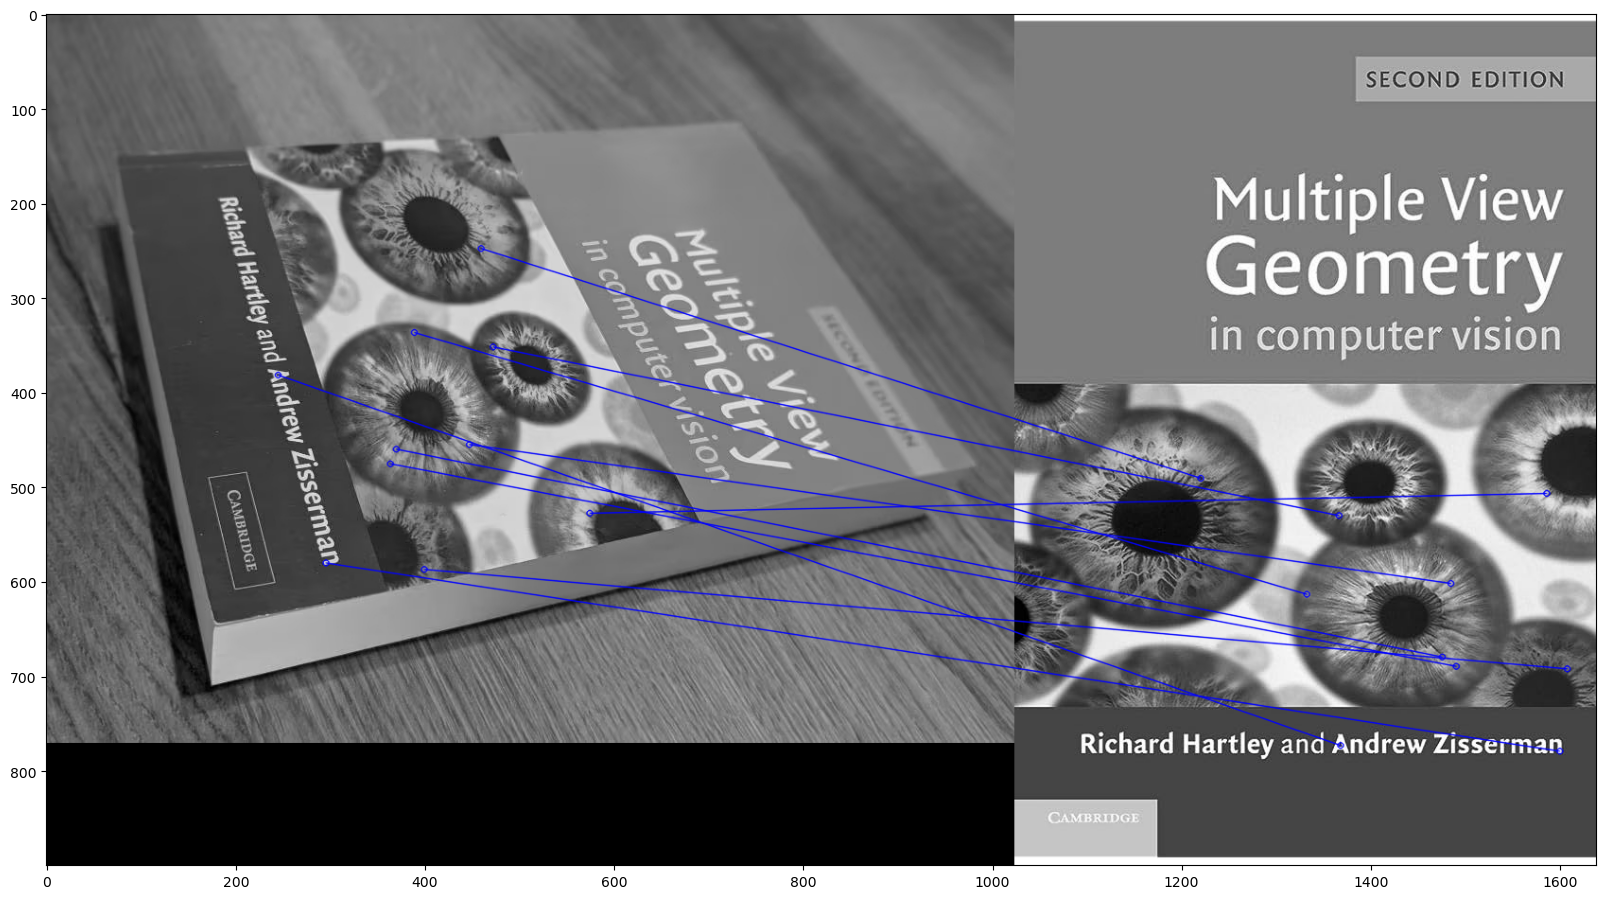

no of matches without Ratio Test in Brute Force Matcher 2624
no of matches without Ratio Test in FLANN Based Matcher 2624
no of matches with Ratio Test in Brute Force Matcher 10
no of matches with Ratio Test in FLANN Based Matcher 11


(-0.5, 1638.5, 899.5, -0.5)

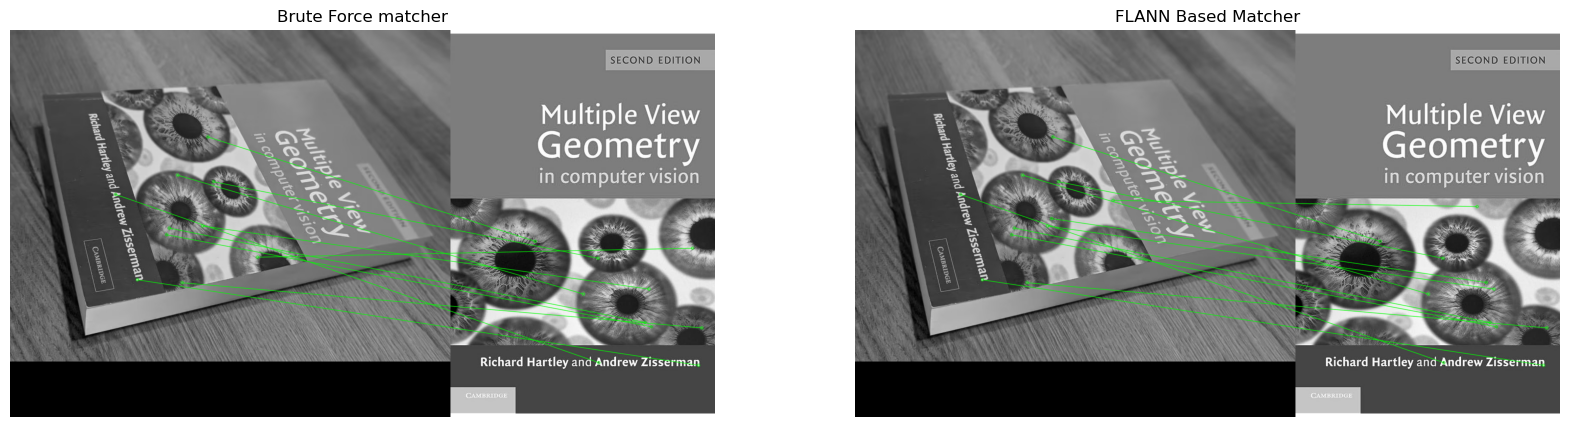

In [18]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('lab5/book-1.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('lab5/book-2.jpg',cv.IMREAD_GRAYSCALE)

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
print("Matches without ratio test", len(matches))
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.38*n.distance:
        good.append([m])
print("Matches with ratio test", len(good))
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good, None, matchColor = (0,0,255), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,12))
plt.imshow(img3)
plt.show()

Matches without ratio test 2624
Matches with ratio test 13


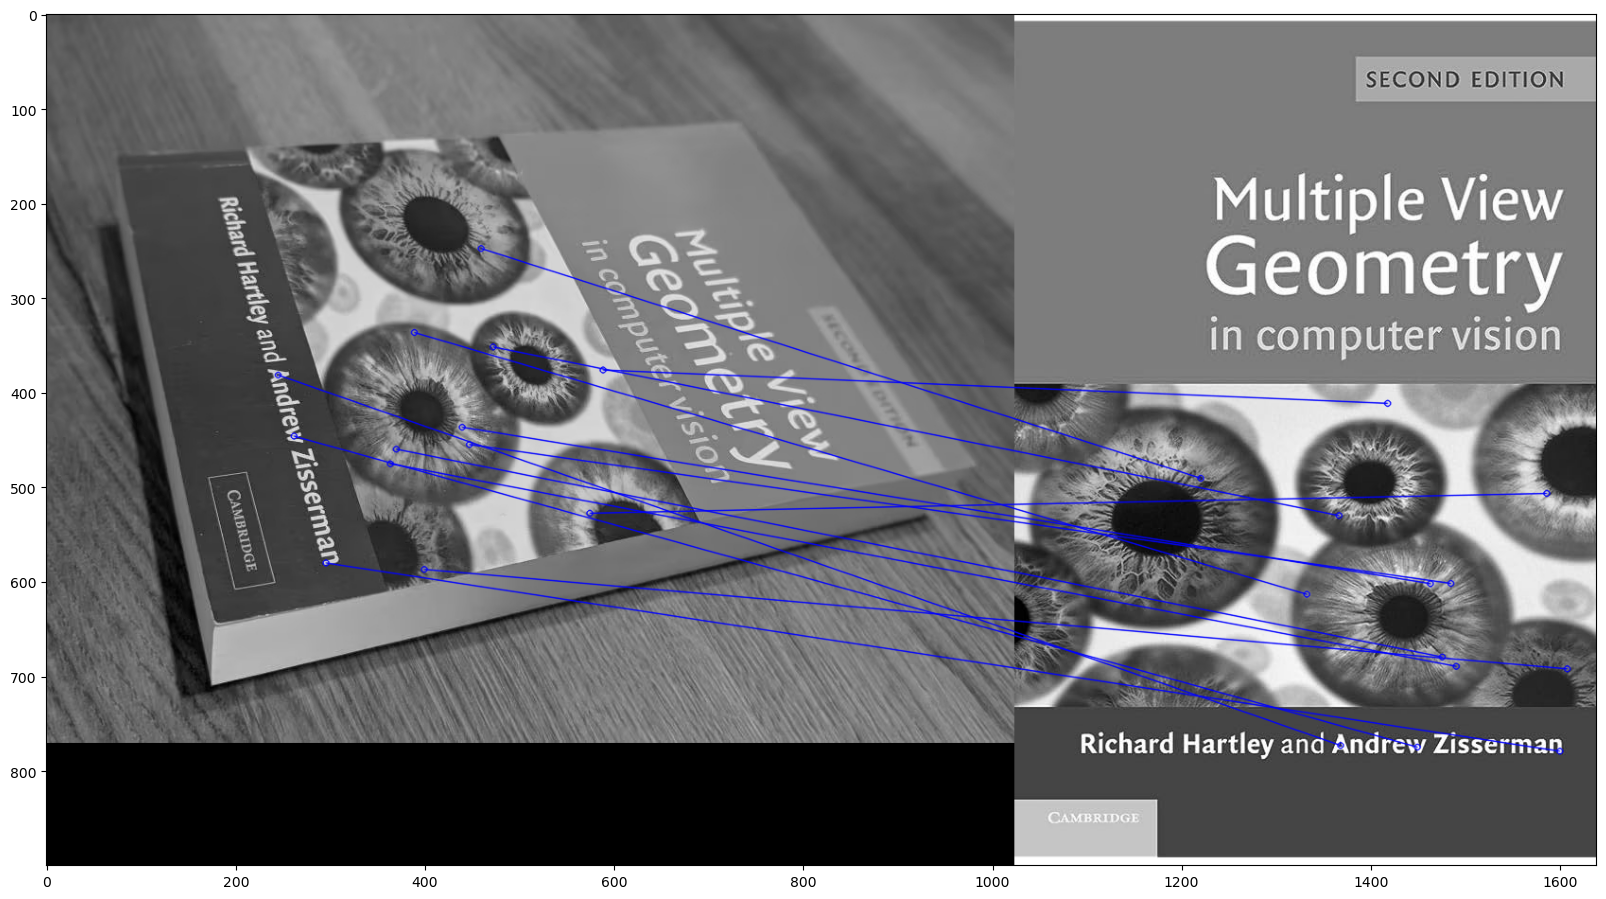

In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('lab5/book-1.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('lab5/book-2.jpg',cv.IMREAD_GRAYSCALE)

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN Based Matcher
fb = cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)
matches = fb.knnMatch(des1,des2,k=2)
print("Matches without ratio test", len(matches))
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.38*n.distance:
        good.append([m])
print("Matches with ratio test", len(good))
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good, None, matchColor = (0,0,255), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,12))
plt.imshow(img3)
plt.show()

Matches without ratio test 270
Matches with ratio test 8
Matches without ratio test 270
Matches with ratio test 8


(-0.5, 375.5, 241.5, -0.5)

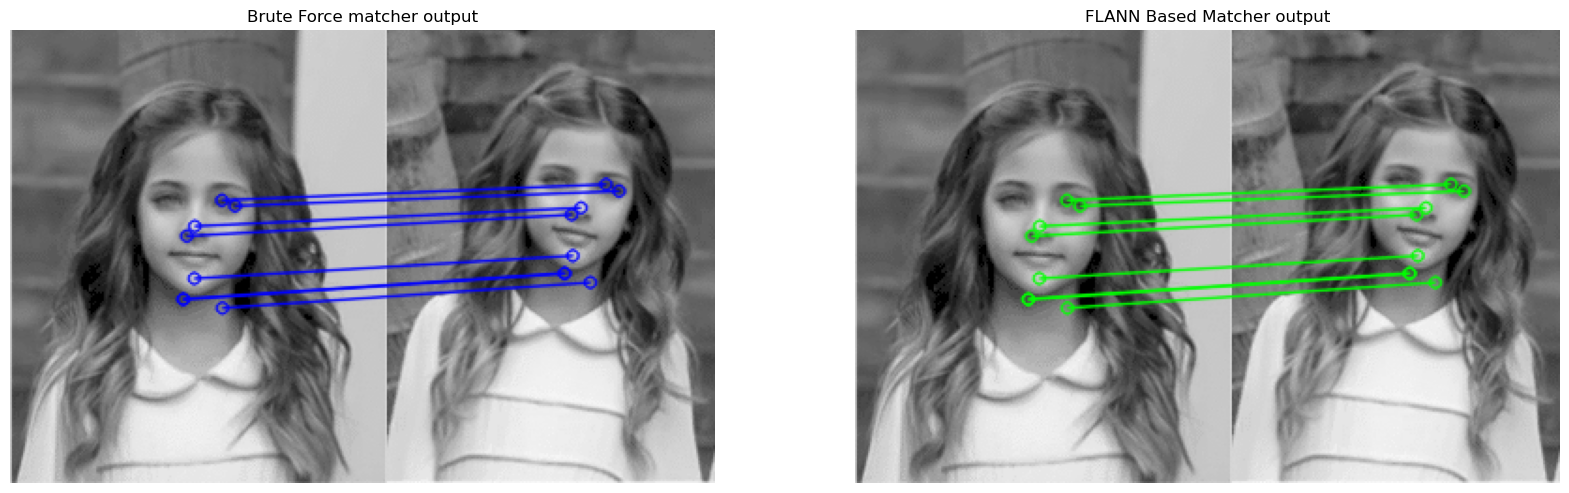

In [36]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('lab5/ss1.png',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('lab5/ss2.png',cv.IMREAD_GRAYSCALE)

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
bf_matches = bf.knnMatch(des1,des2,k=2)
print("Matches without ratio test", len(bf_matches))
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.55*n.distance:
        good.append([m])
print("Matches with ratio test", len(good))

# FLANN Based Matcher
fb = cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)
fb_matches = fb.knnMatch(des1,des2,k=2)
print("Matches without ratio test", len(fb_matches))
# Apply ratio test
good_fb = []
for m,n in matches:
    if m.distance < 0.55*n.distance:
        good_fb.append([m])
print("Matches with ratio test", len(good_fb))

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good, None, matchColor = (0,0,255), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img4 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good_fb, None, matchColor = (0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#Plot the images
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img3)
ax[0].set_title('Brute Force matcher output')
ax[0].axis('off')
ax[1].imshow(img4)
ax[1].set_title('FLANN Based Matcher output')
ax[1].axis('off')

In [46]:
#Import Library
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Import Image
checker = cv.imread('lab5/calib_pattern.jpg', cv.IMREAD_COLOR)

world_coordinate = [[0, -5, 5], [0, -3, 5], [0, -1, 5], [-1, 0, 5], [-3, 0, 5],
[-5, 0, 5],[0, -5, 3], [0, -3, 3], [0, -1, 3], [-1, 0, 3], [-3, 0, 3], [-5, 0,
3],[0, -5, 1], [0, -3, 1], [0, -1, 1], [-1, 0, 1], [-3, 0, 1], [-5, 0, 1]]

image_coordinate = [[213.1027, 170.0499], [258.1908, 181.3219], [306.41, 193.8464], [351.498, 183.8268], [382.8092, 155.6468], [411.6155, 130.5978],
[234.3943, 263.9834], [276.9775, 277.1341], [323.318, 291.5372], [363.3963, 282.1438], [392.8288, 251.4589], [419.1301, 223.9051],
[223.7485, 218.2691], [267.5841, 230.7935], [314.5509, 244.5705], [357.7603, 235.1771], [387.819, 205.1184], [415.3728, 178.1908]]

for x,y in image_coordinate:
    marked_img = cv.circle(checker, (round(x), round(y)), 3, (0,0,255), -1)
    
cv.imshow("Marked Image", marked_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
# Import Library
import numpy as np
import cv2 as cv

# Import Image
checker = cv.imread("lab5/calib_pattern.jpg", cv.IMREAD_GRAYSCALE)

# Given world coordinate points
world_coordinate = np.array([
[0, -5, 5], [0, -3, 5], [0, -1, 5], [-1, 0, 5],
[-3, 0, 5], [-5, 0, 5], [0, -5, 3], [0, -3, 3],
[0, -1, 3], [-1, 0, 3], [-3, 0, 3], [-5, 0, 3],
[0, -5, 1], [0, -3, 1], [0, -1, 1], [-1, 0, 1],
[-3, 0, 1], [-5, 0, 1]
], dtype = np.float32)

# Given corresponding image coordinate points
image_coordinate = np.array([
[213.1027, 170.0499], [258.1908, 181.3219], [306.41, 193.8464], [351.498,
183.8268],
[382.8092, 155.6468], [411.6155, 130.5978], [223.7485, 218.2691],
[267.5841, 230.7935],
[314.5509, 244.5705], [357.7603, 235.1771], [387.819, 205.1184], [415.3728,
178.1908],
[234.3943, 263.9834], [276.9775, 277.1341], [323.318, 291.5372], [363.3963,
282.1438],
[392.8288, 251.4589], [419.1301, 223.9051]
], dtype = np.float32)

# Add a column of one to the world coordinate points to convert them to homogeneous coordinates
homogeneous_world_coordinate = np.hstack((world_coordinate, np.ones((world_coordinate.shape[0], 1))))

A = []
for i in range(len(world_coordinate)):
    X, Y, Z = world_coordinate[i]
    x, y = image_coordinate[i]
    A.append([-X, -Y, -Z, -1, 0, 0, 0, 0, x * X, x * Y, x * Z, x])
    A.append([0, 0, 0, 0, -X, -Y, -Z, -1, y * X, y * Y, y * Z, y])
    
A = np.array(A)
U, S, Vt = np.linalg.svd(A)
camera_matrix = Vt[-1, :].reshape(3, 4)
U, S_diag, Vt = np.linalg.svd(camera_matrix[:, :3]) # Decompose the camera matrix without the last column
S = np.zeros((3, 4))
S[:3, :3] = np.diag(S_diag)

print("Singular Values:")
print(S_diag)
print("\nEigenvectors (Matrix U):")
print(U)
print("Camera Matrix:")
print(camera_matrix)

# Using OpenCv CalibrateCamera
camera_mtx = cv2.initCameraMatrix2D([world_coordinate], [image_coordinate], checker.shape[::-1])  
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera([world_coordinate], [image_coordinate], checker.shape[::-1], camera_mtx, None, flags=cv.CALIB_USE_INTRINSIC_GUESS)
# Test the camera matrix by projecting 3D points
reprojected_image_coordinate_homogeneous = np.dot(camera_matrix, homogeneous_world_coordinate.T)
reprojected_image_coordinate = reprojected_image_coordinate_homogeneous[:2] / reprojected_image_coordinate_homogeneous[2]
# Calculate re-projection error
reprojection_errors = np.linalg.norm(image_coordinate.T - reprojected_image_coordinate, axis=0)
average_reprojection_error = np.mean(reprojection_errors)
print("Re-projection Errors:")
print(reprojection_errors)
print("Average Re-projection Error:", average_reprojection_error)

Singular Values:
[6.88511406e-02 6.09584986e-02 7.08009774e-05]

Eigenvectors (Matrix U):
[[-9.21746745e-01  3.87792098e-01 -4.76933493e-04]
 [-3.87792026e-01 -9.21746868e-01 -2.37871471e-04]
 [-5.31856630e-04 -3.43062481e-05  9.99999858e-01]]
Camera Matrix:
[[ 5.29664749e-02 -3.69423671e-02  2.04014531e-02 -7.33335658e-01]
 [-1.86948914e-02 -4.02549705e-03  5.91971955e-02 -6.73615632e-01]
 [ 5.63200367e-05  4.07501225e-05  3.90586452e-05 -2.09039110e-03]]
Re-projection Errors:
[0.42059143 0.2132221  1.06214858 0.83957043 0.14255353 0.10563791
 0.36828401 0.32246772 0.88573124 0.48769902 0.27858887 0.37669036
 0.47640225 0.03689451 0.30113901 0.50413372 0.16297946 0.60524657]
Average Re-projection Error: 0.42166559483810206


In [7]:
import numpy as np
import cv2
import glob
import sys
import pickle

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

gray = cv2.imread("Lab5/calib_pattern.jpg", cv2.IMREAD_GRAYSCALE)

# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (7,6),None)
cv2.imshow('img',gray)
cv2.waitKey(1000)

# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)
    corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    imgpoints.append(corners2)

    # Draw and display the corners
    img = cv2.drawChessboardCorners(gray, (7,6), corners2,ret)
    cv2.imshow('img',img)
    cv2.waitKey(1000)

cv2.imshow('img',img)   
cv2.waitKey(1000)        
cv2.destroyAllWindows()

with open('workfile.pckl','wb') as f:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    pickle.dump((mtx,dist),f)
    
# Re-projection errors
tot_error = 0
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print ("total error: ", mean_error/len(objpoints))

total error:  0.0
